In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from statsmodels.stats.anova import AnovaRM
import pylab

In [19]:
preseason_nitrogen = pd.read_csv('../Data/Preseason_nitrogen/Preseason_All_Blocks_NH4&NO3.csv')
preseason_nitrogen['ID'] = preseason_nitrogen['ID'].astype('str')
preseason_nitrogen['Block'] = [x[0] for x in preseason_nitrogen['ID']]
preseason_nitrogen['Water'] = [x[1] for x in preseason_nitrogen['ID']]
preseason_nitrogen['Nitrogen'] = [x[2] for x in preseason_nitrogen['ID']]
preseason_nitrogen.rename(columns = {' Extract NH4-N (mg N/ kg soil)':'NH4','Extract NO3-N (mg N/kg soil)':'NO3'}, inplace = True)
preseason_nitrogen.head()

,Experiment,Date,ID,Plot,Depth(cm),NH4,NO3,Extract Inorganic N (mg N/kg soil),Block,Water,Nitrogen
0,Preseason,4/28/2022,114,1,0-15,2.905224,0.547156,3.452380,1,1,4
1,NxWater,4/28/2022,114,1,15-30,2.233066,0.071549,2.304614,1,1,4
2,Preseason,4/28/2022,114,1,30-90,1.690856,0.071722,1.762578,1,1,4
3,NxWater,4/28/2022,114,1,90-120,1.253962,0.034273,1.288235,1,1,4
4,Preseason,4/28/2022,111,2,0-15,2.028401,0.562071,2.590471,1,1,1


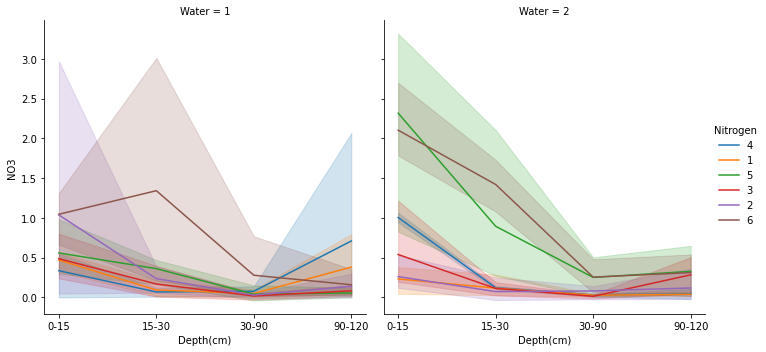

In [37]:
sns.relplot(x = 'Depth(cm)', y = 'NO3', hue = 'Nitrogen', kind = 'line',col = 'Water', data = preseason_nitrogen)
# plt.savefig('../Figures/Neutron probe/depth_treatments_through_time.jpg', dpi = 300, bbox_inches='tight', format = 'jpg')

In [28]:
# normality test
# Plot residuals
for test in ['NH4','NO3']:
    for depth in ['0-15', '15-30', '30-90', '90-120']:
        tmp_df = preseason_nitrogen[preseason_nitrogen['Depth(cm)'] == depth]
        stat, p = shapiro(tmp_df[test])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')

Statistics=0.397, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.390, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.311, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.288, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.809, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.632, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.648, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.585, p=0.000
Sample does not look Gaussian (reject H0)
